In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [5]:
df = pd.read_csv('Cleaned_SQL_data.csv')

In [6]:
df.head()

,UniqueID,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,SalesDateConverted,PropertySplitAddress,PropertySplitCity,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState
0,2045,007 00 0 125.00,SINGLE FAMILY,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,50000.0,168200.0,...,1986.0,3.0,3.0,0.0,4/9/2013,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,50000.0,264100.0,...,1998.0,3.0,3.0,2.0,6/10/2014,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,50000.0,216200.0,...,1987.0,4.0,3.0,0.0,9/26/2016,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,50000.0,147300.0,...,1985.0,3.0,3.0,0.0,1/29/2016,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,50000.0,152300.0,...,1984.0,4.0,3.0,0.0,10/10/2014,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UniqueID              56373 non-null  int64  
 1   ParcelID              56373 non-null  object 
 2   LandUse               56373 non-null  object 
 3   SalePrice             56373 non-null  int64  
 4   LegalReference        56373 non-null  object 
 5   SoldAsVacant          56373 non-null  object 
 6   OwnerName             25215 non-null  object 
 7   Acreage               25969 non-null  float64
 8   LandValue             25969 non-null  float64
 9   BuildingValue         25969 non-null  float64
 10  TotalValue            25969 non-null  float64
 11  YearBuilt             24118 non-null  float64
 12  Bedrooms              24112 non-null  float64
 13  FullBath              24230 non-null  float64
 14  HalfBath              24099 non-null  float64
 15  SalesDateConverted 

In [12]:
df = df.rename(columns = {
    'LandUse': 'land_use', 'SalePrice':'sale_price', 'SoldAsVacant':'sold_as_vacant', 'PropertySplitCity':'property_city',
    'SalesDateConverted':'Sale_year'
 })

In [13]:
df.head()

,UniqueID,ParcelID,land_use,sale_price,LegalReference,sold_as_vacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,Sale_year,PropertySplitAddress,property_city,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState
0,2045,007 00 0 125.00,SINGLE FAMILY,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,50000.0,168200.0,...,1986.0,3.0,3.0,0.0,4/9/2013,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,50000.0,264100.0,...,1998.0,3.0,3.0,2.0,6/10/2014,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,50000.0,216200.0,...,1987.0,4.0,3.0,0.0,9/26/2016,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,50000.0,147300.0,...,1985.0,3.0,3.0,0.0,1/29/2016,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,50000.0,152300.0,...,1984.0,4.0,3.0,0.0,10/10/2014,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN


In [14]:
df_copy = df.copy()

In [15]:
df_copy.head()

,UniqueID,ParcelID,land_use,sale_price,LegalReference,sold_as_vacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,Sale_year,PropertySplitAddress,property_city,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState
0,2045,007 00 0 125.00,SINGLE FAMILY,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,50000.0,168200.0,...,1986.0,3.0,3.0,0.0,4/9/2013,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,50000.0,264100.0,...,1998.0,3.0,3.0,2.0,6/10/2014,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,50000.0,216200.0,...,1987.0,4.0,3.0,0.0,9/26/2016,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,50000.0,147300.0,...,1985.0,3.0,3.0,0.0,1/29/2016,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,50000.0,152300.0,...,1984.0,4.0,3.0,0.0,10/10/2014,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN


In [22]:
landusee = pd.DataFrame(df_copy['land_use'])
landuse = pd.DataFrame(landusee)
landuse

,land_use
0,SINGLE FAMILY
1,SINGLE FAMILY
2,SINGLE FAMILY
3,SINGLE FAMILY
4,SINGLE FAMILY
...,...
56368,SINGLE FAMILY
56369,SINGLE FAMILY
56370,SINGLE FAMILY
56371,SINGLE FAMILY


In [19]:
land_use_count = pd.DataFrame(columns = {0: 'count'})

In [23]:
land_count = pd.DataFrame(landuse['land_use'].value_counts())

In [24]:
land_count.head()

,land_use
SINGLE FAMILY,34119
RESIDENTIAL CONDO,14064
VACANT RESIDENTIAL LAND,3540
VACANT RES LAND,1549
DUPLEX,1372


In [26]:
land_count = land_count.reset_index()

In [28]:
land_count.head()

,index,land_use
0,SINGLE FAMILY,34119
1,RESIDENTIAL CONDO,14064
2,VACANT RESIDENTIAL LAND,3540
3,VACANT RES LAND,1549
4,DUPLEX,1372


In [29]:
land_count = land_count.rename(columns = {
    'index':'landUse', 'land_use':'count'
})

In [71]:
xy = land_count.head(10)

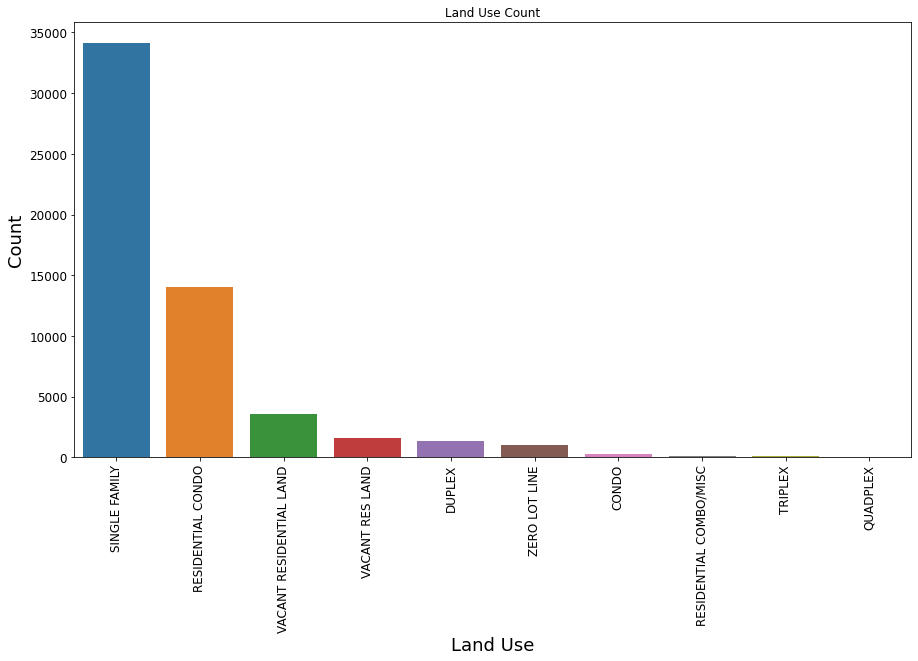

In [54]:
plt.figure(figsize = (15,8))
sns.barplot(x = land_count.loc[0:9, 'landUse'], y=land_count.loc[0:9, 'count'])
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Land Use', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title('Land Use Count')
plt.show()

In [72]:
px.bar(xy, x= 'landUse', y = 'count')

In [42]:
df_copy.head()

,UniqueID,ParcelID,land_use,sale_price,LegalReference,sold_as_vacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,Sale_year,PropertySplitAddress,property_city,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState
0,2045,007 00 0 125.00,SINGLE FAMILY,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,50000.0,168200.0,...,1986.0,3.0,3.0,0.0,4/9/2013,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,50000.0,264100.0,...,1998.0,3.0,3.0,2.0,6/10/2014,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,50000.0,216200.0,...,1987.0,4.0,3.0,0.0,9/26/2016,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,50000.0,147300.0,...,1985.0,3.0,3.0,0.0,1/29/2016,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,50000.0,152300.0,...,1984.0,4.0,3.0,0.0,10/10/2014,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN
